In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('AusApparalSales4thQrt2020.csv')

In [3]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [4]:
#Data Wrangling
#a. Inspect the Data for Missing or Incorrect Entries
# Check for missing values in the dataset
missing_data = df.isna().sum()
print("Missing Data in Each Column:\n", missing_data)

Missing Data in Each Column:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [6]:
#b. Handle Missing Data
#Option 1: Drop rows with missing values
df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the 'Sales' and 'Units' columns
df[['Sales', 'Unit']] = scaler.fit_transform(df[['Sales', 'Unit']])

# Display the normalized data
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


In [9]:
#d. Group Data Using GroupBy()
# Group by 'State' and aggregate the sum of 'Sales' and 'Units'
grouped_data = df.groupby('State').agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index()

# Display the grouped data
grouped_data.head()

,State,Sales,Unit
0,NSW,441.714286,441.714286
1,NT,109.079365,109.079365
2,QLD,177.888889,177.888889
3,SA,339.412698,339.412698
4,TAS,110.222222,110.222222


In [10]:
#Step 4: Data Analysis
#a. Descriptive Statistical Analysis
mean_sales = np.mean(df['Sales'])
median_sales = np.median(df['Sales'])
mode_sales = df['Sales'].mode()[0]
std_dev_sales = np.std(df['Sales'])

In [11]:
print(f"Sales - Mean: {mean_sales}, Median: {median_sales}, Mode: {mode_sales}, Std Dev: {std_dev_sales}")

Sales - Mean: 0.25405433778449654, Median: 0.1904761904761905, Mode: 0.1111111111111111, Std Dev: 0.20477062669823143


In [12]:
mean_units = np.mean(df['Unit'])
median_units = np.median(df['Unit'])
mode_units = df['Unit'].mode()[0]
std_dev_units = np.std(df['Unit'])

In [13]:
print(f"Units - Mean: {mean_units}, Median: {median_units}, Mode: {mode_units}, Std Dev: {std_dev_units}")

Units - Mean: 0.2540543377844965, Median: 0.19047619047619047, Mode: 0.1111111111111111, Std Dev: 0.2047706266982314


In [14]:
#b. Identify Highest and Lowest Sales Groups
highest_sales_group = df.groupby('Group')['Sales'].sum().idxmax()
print(f"Highest Sales Group: {highest_sales_group}")

Highest Sales Group:  Men


In [15]:
lowest_sales_group = df.groupby('Group')['Sales'].sum().idxmin()
print(f"Lowest Sales Group: {lowest_sales_group}")

Lowest Sales Group:  Seniors


In [16]:
#c. Generate Weekly, Monthly, and Quarterly Reports
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
# Create additional columns for Week, Month, and Quarter
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

In [18]:
# Generate reports
weekly_report = df.groupby('Week').agg({'Sales': 'sum', 'Unit': 'sum'})
monthly_report = df.groupby('Month').agg({'Sales': 'sum', 'Unit': 'sum'})
quarterly_report = df.groupby('Quarter').agg({'Sales': 'sum', 'Unit': 'sum'})

In [19]:
print("Weekly Report:\n", weekly_report)

Weekly Report:
            Sales        Unit
Week                        
40     84.857143   84.857143
41    152.777778  152.777778
42    150.476190  150.476190
43    151.587302  151.587302
44    122.460317  122.460317
45    113.809524  113.809524
46    115.761905  115.761905
47    115.380952  115.380952
48    117.698413  117.698413
49    169.412698  169.412698
50    181.492063  181.492063
51    182.317460  182.317460
52    183.047619  183.047619
53     79.571429   79.571429


In [20]:
print("Monthly Report:\n", monthly_report)

Monthly Report:
             Sales        Unit
Month                        
10     645.650794  645.650794
11     495.761905  495.761905
12     779.238095  779.238095


In [21]:
print("Quarterly Report:\n", quarterly_report)

Quarterly Report:
                Sales         Unit
Quarter                          
4        1920.650794  1920.650794


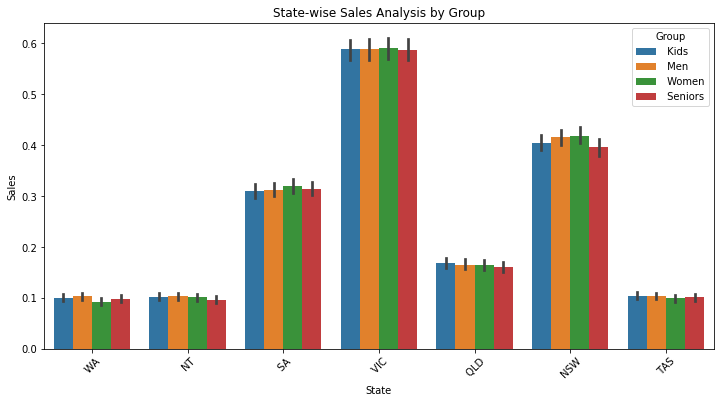

In [22]:
#Step 5: Data Visualization
#a. Construct Dashboard Visualizations
#1 State-wise Sales Analysis by Group
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=df)
plt.title('State-wise Sales Analysis by Group')
plt.xticks(rotation=45)
plt.show()


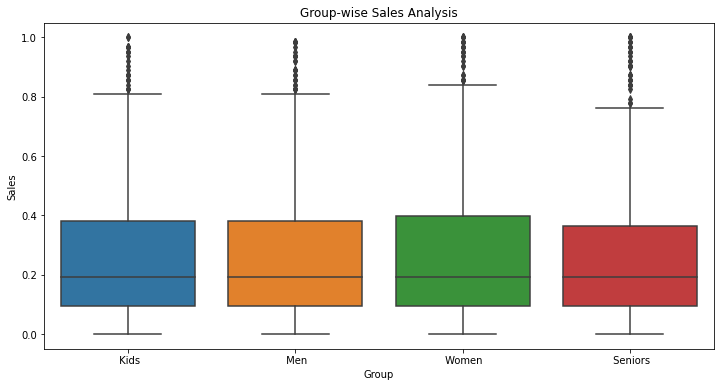

In [23]:
#2 Group-wise Sales Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Group', y='Sales', data=df)
plt.title('Group-wise Sales Analysis')
plt.show()

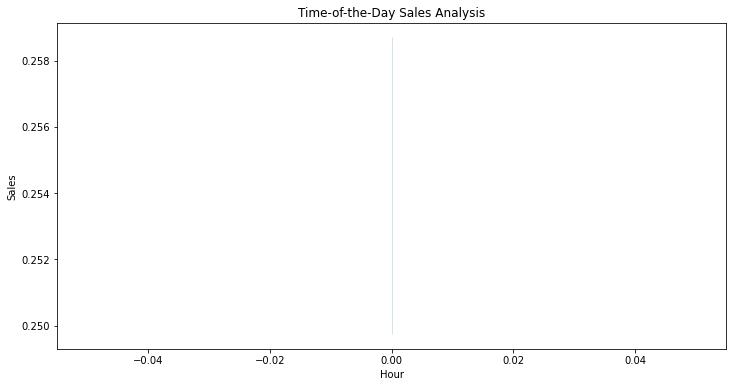

In [24]:
#Time-of-the-Day Sales Analysis:
df['Hour'] = df['Date'].dt.hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Sales', data=df)
plt.title('Time-of-the-Day Sales Analysis')
plt.show()

In [25]:
#Step 6: Report Generation
# Sales Data Analysis Report

## Data Wrangling
#Steps taken to clean and normalize the data.

## Data Analysis
 #Descriptive statistics.
 #Group-wise and time-based sales analysis.

## Data Visualization
 #Visual representations of key insights.
